In [24]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [25]:
reviews=[]
stars=[]
date=[]
country=[]

In [26]:
for i in range(1,36):
    page=requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways")
    soup=BeautifulSoup(page.content,"html5")
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    for item in soup.find_all("div", class_="rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
    for item in soup.find_all("time"):
        date.append(item.text)
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip("()"))

In [27]:
len(reviews)

350

In [28]:
len(country)

350

In [29]:
stars=stars[:350]

In [30]:
df=pd.DataFrame({"reviews":reviews, "stars":stars, "date":date, "country":country})

In [31]:
df.head()

reviews  \
0  ✅ Trip Verified |  Check-in Desk rude and dism...   
1  ✅ Trip Verified | I chose British Airways espe...   
2  Not Verified | I booked Premium Economy from I...   
3  ✅ Trip Verified | A simple story with an unfor...   
4  ✅ Trip Verified |  Flight was delayed due to t...   

                           stars            date             country  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  26th July 2023   (United Kingdom)   
1                              2  25th July 2023            (Spain)   
2                              1  24th July 2023   (United Kingdom)   
3                              1  21st July 2023          (Germany)   
4                              1  21st July 2023   (United Kingdom)

In [32]:
df.shape

(350, 4)

In [33]:
import os
cwd=os.getcwd()
df.to_csv(cwd+"/BA_reviews.csv")

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [35]:
cwd=os.getcwd()
df=pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)

In [36]:
df.head()

reviews  stars            date  \
0  ✅ Trip Verified |  Check-in Desk rude and dism...      5  26th July 2023   
1  ✅ Trip Verified | I chose British Airways espe...      2  25th July 2023   
2  Not Verified | I booked Premium Economy from I...      1  24th July 2023   
3  ✅ Trip Verified | A simple story with an unfor...      1  21st July 2023   
4  ✅ Trip Verified |  Flight was delayed due to t...      1  21st July 2023   

              country  
0   (United Kingdom)   
1            (Spain)   
2   (United Kingdom)   
3          (Germany)   
4   (United Kingdom)

In [37]:
df['verified']=df.reviews.str.contains("Trip Verified")

In [38]:
df['verified']

0       True
1       True
2      False
3       True
4       True
       ...  
345    False
346     True
347    False
348     True
349     True
Name: verified, Length: 350, dtype: bool

In [49]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma=WordNetLemmatizer()
reviews_data=df.reviews.str.strip("Trip Verified |")
corpus=[]
for rev in reviews_data:
    rev=re.sub('[^a-zA-Z]',' ',rev)
    rev=rev.lower()
    rev=rev.split()
    rev=[lemma.lemmatize(word)for word in rev if word not in set(stopwords.words("english"))]
    rev=" ".join(rev)
    corpus.append(rev)

In [79]:
df['corpus']=corpus

In [41]:
df.head()

reviews  stars            date  \
0  ✅ Trip Verified |  Check-in Desk rude and dism...      5  26th July 2023   
1  ✅ Trip Verified | I chose British Airways espe...      2  25th July 2023   
2  Not Verified | I booked Premium Economy from I...      1  24th July 2023   
3  ✅ Trip Verified | A simple story with an unfor...      1  21st July 2023   
4  ✅ Trip Verified |  Flight was delayed due to t...      1  21st July 2023   

              country  verified  \
0   (United Kingdom)       True   
1            (Spain)       True   
2   (United Kingdom)      False   
3          (Germany)       True   
4   (United Kingdom)       True   

                                              corpus  
0  trip verified check desk rude dismissive fligh...  
1  trip verified chose british airway especially ...  
2  verified booked premium economy inv lax via lh...  
3  trip verified simple story unfortunate outcome...  
4  trip verified flight delayed due inbound fligh...

In [42]:
df.stars.unique()

array([5, 2, 1, 4, 8, 9], dtype=int64)

In [43]:
df.stars=df.stars.value_counts()

In [44]:
df.drop(df[df.stars=="None"].index, axis=0, inplace=True)

In [45]:
df.stars.unique()

array([ nan, 127.,  96.,  32.,  31.])

In [46]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    True   False  False    False     False     344
         False  False  False    False     False       6
dtype: int64

In [47]:
df.country.isnull().value_counts()

False    350
Name: country, dtype: int64

In [48]:
df.drop(df[df.country.isnull()==True].index, axis=0, inplace=True)

In [50]:
df.reset_index(drop=True)

reviews  stars            date  \
0    ✅ Trip Verified |  Check-in Desk rude and dism...    NaN  26th July 2023   
1    ✅ Trip Verified | I chose British Airways espe...  127.0  25th July 2023   
2    Not Verified | I booked Premium Economy from I...   96.0  24th July 2023   
3    ✅ Trip Verified | A simple story with an unfor...    NaN  21st July 2023   
4    ✅ Trip Verified |  Flight was delayed due to t...   32.0  21st July 2023   
..                                                 ...    ...             ...   
345  Not Verified |  Fast and friendly check in (to...    NaN  20th July 2023   
346  ✅ Trip Verified |  I don't understand why Brit...    NaN  20th July 2023   
347  Not Verified |  I'm sure that BA have graduall...    NaN  20th July 2023   
348  ✅ Trip Verified |  Customer Service does not e...    NaN  18th July 2023   
349  ✅ Trip Verified | Another really great pair of...    NaN  17th July 2023   

                country  verified  \
0     (United Kingdom)       True   
1              (Spain)       True   
2     (United Kingdom)      False   
3            (Germany)       True   
4     (United Kingdom)       True   
..                  ...       ...   
345   (United Kingdom)      False   
346   (United Kingdom)       True   
347   (United Kingdom)      False   
348   (United Kingdom)       True   
349   (United Kingdom)       True   

                                                corpus  
0    trip verified check desk rude dismissive fligh...  
1    trip verified chose british airway especially ...  
2    verified booked premium economy inv lax via lh...  
3    trip verified simple story unfortunate outcome...  
4    trip verified flight delayed due inbound fligh...  
..                                                 ...  
345  verified fast friendly check total contrast ga...  
346  trip verified understand british airway classi...  
347  verified sure ba gradually made economy experi...  
348  trip verified customer service exist one world...  
349  trip verified another really great pair flight...  

[350 rows x 6 columns]

In [51]:

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [59]:
cwd=os.getcwd()
df=pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)
df=df.reset_index(drop=True)

In [60]:
df.head()

reviews  stars            date  \
0  ✅ Trip Verified |  Check-in Desk rude and dism...      5  26th July 2023   
1  ✅ Trip Verified | I chose British Airways espe...      2  25th July 2023   
2  Not Verified | I booked Premium Economy from I...      1  24th July 2023   
3  ✅ Trip Verified | A simple story with an unfor...      1  21st July 2023   
4  ✅ Trip Verified |  Flight was delayed due to t...      1  21st July 2023   

              country  
0   (United Kingdom)   
1            (Spain)   
2   (United Kingdom)   
3          (Germany)   
4   (United Kingdom)

In [61]:
df.stars.mean()

3.262857142857143

Text(0.5, 0.98, 'Counts for each ratings')

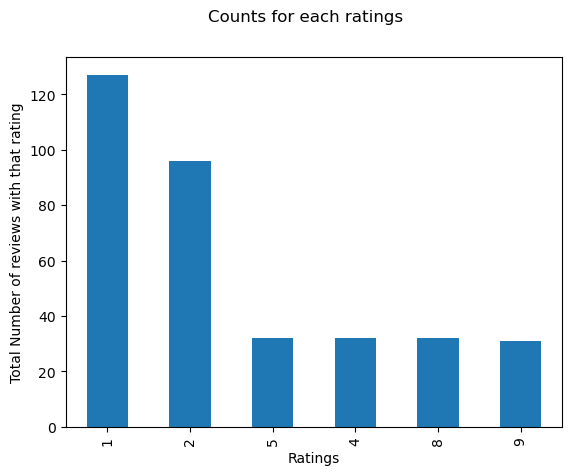

In [62]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [63]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [64]:
df_ratings = df_ratings.reset_index()

In [65]:
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [66]:
df_ratings

Stars  total_counts  pct_values
0      1           127       36.29
1      2            96       27.43
2      5            32        9.14
3      4            32        9.14
4      8            32        9.14
5      9            31        8.86

Text(0.5, 1.0, 'Counts for each ratings')

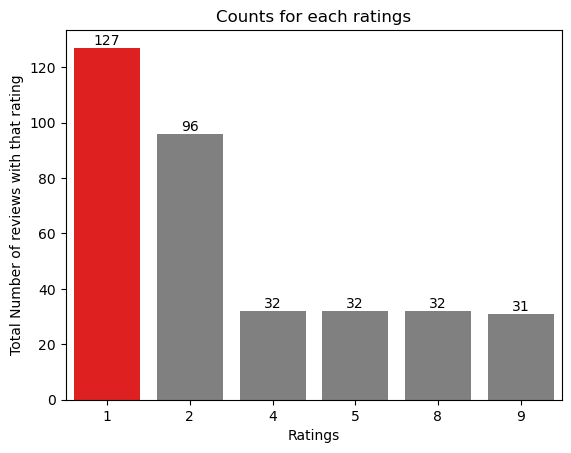

In [67]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [68]:
print(f"{len(df.country.unique())} unique countries")

3 unique countries


In [69]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [70]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

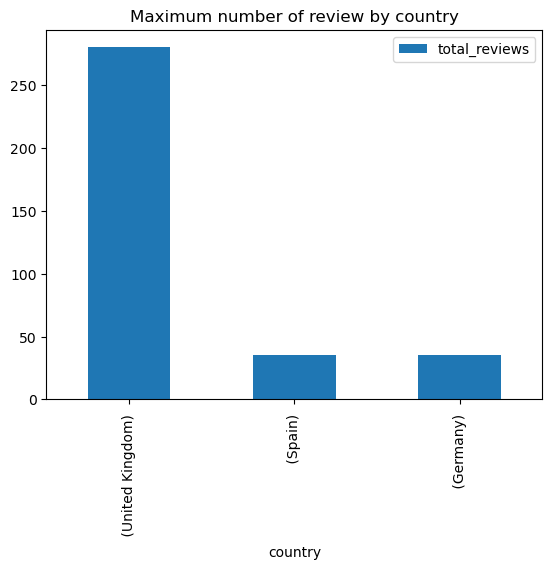

In [71]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

In [72]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

In [73]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 03 Countries with avg highest rating provided to British Airways')

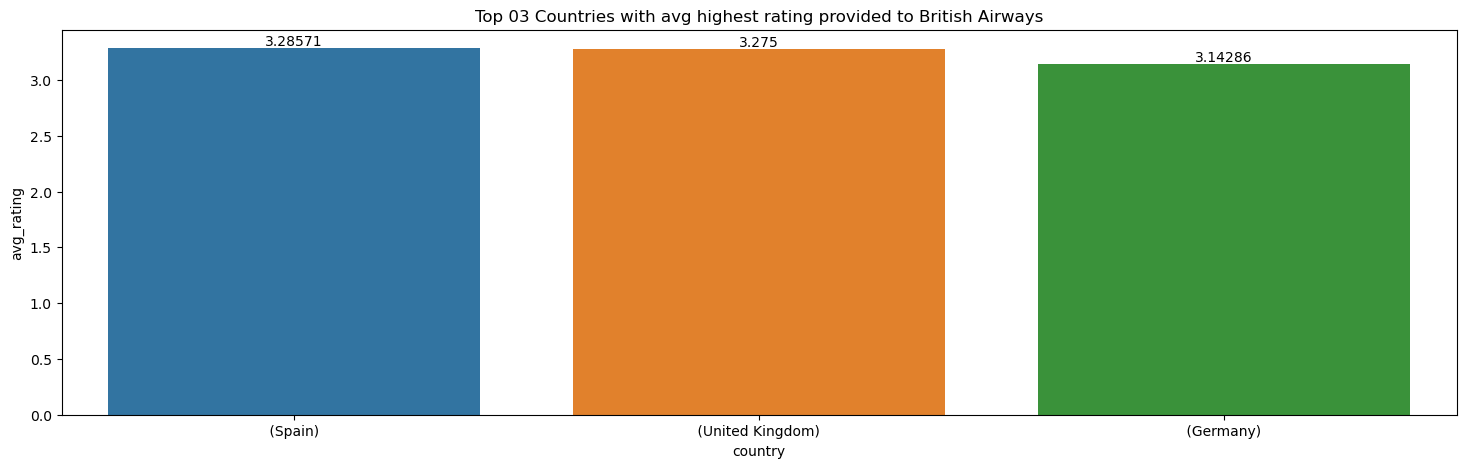

In [75]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 03 Countries with avg highest rating provided to British Airways")

In [76]:
df.date = pd.to_datetime(df.date)

In [77]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

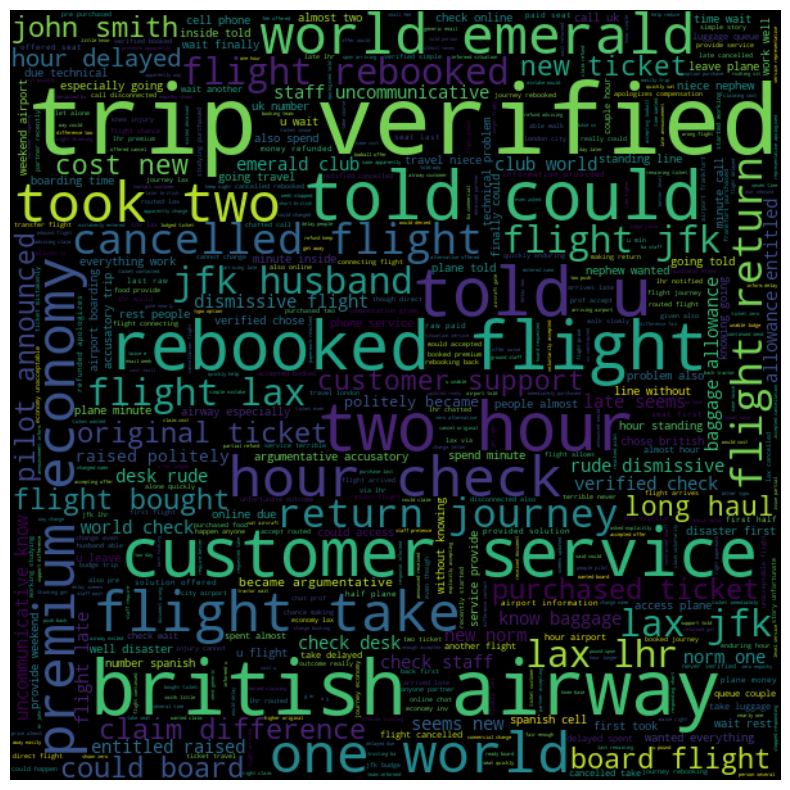

In [84]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

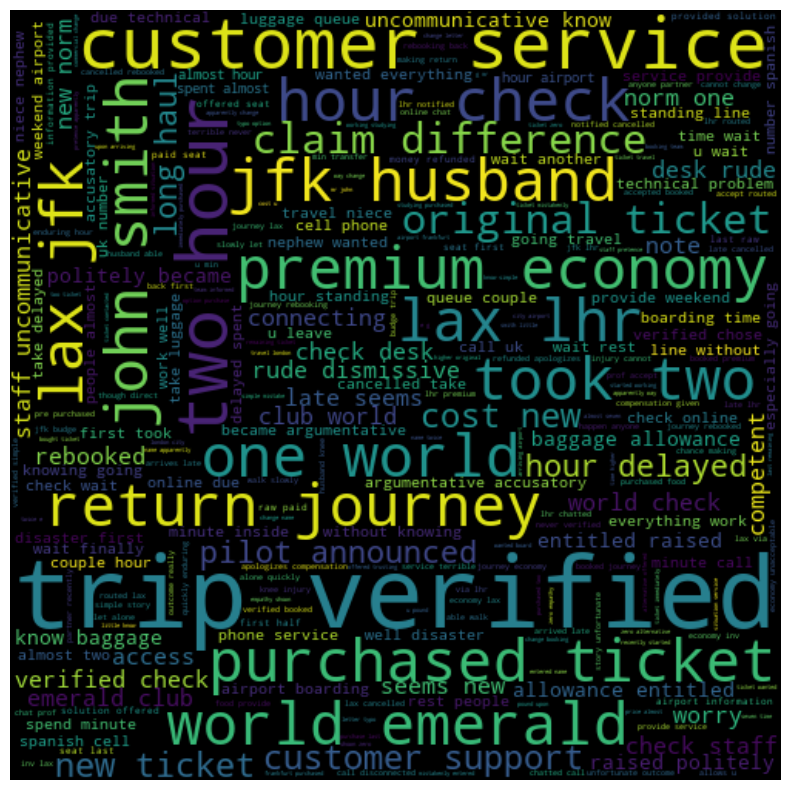

In [85]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [86]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'hour'),
  Text(1, 0, 'service'),
  Text(2, 0, 'told'),
  Text(3, 0, 'verified'),
  Text(4, 0, 'ticket'),
  Text(5, 0, 'trip'),
  Text(6, 0, 'wait'),
  Text(7, 0, 'staff'),
  Text(8, 0, 'airport'),
  Text(9, 0, 'time'),
  Text(10, 0, 'lax'),
  Text(11, 0, 'board'),
  Text(12, 0, 'customer'),
  Text(13, 0, 'experience'),
  Text(14, 0, 'check'),
  Text(15, 0, 'delayed'),
  Text(16, 0, 'seat'),
  Text(17, 0, 'food'),
  Text(18, 0, 'economy'),
  Text(19, 0, 'rebooked')])

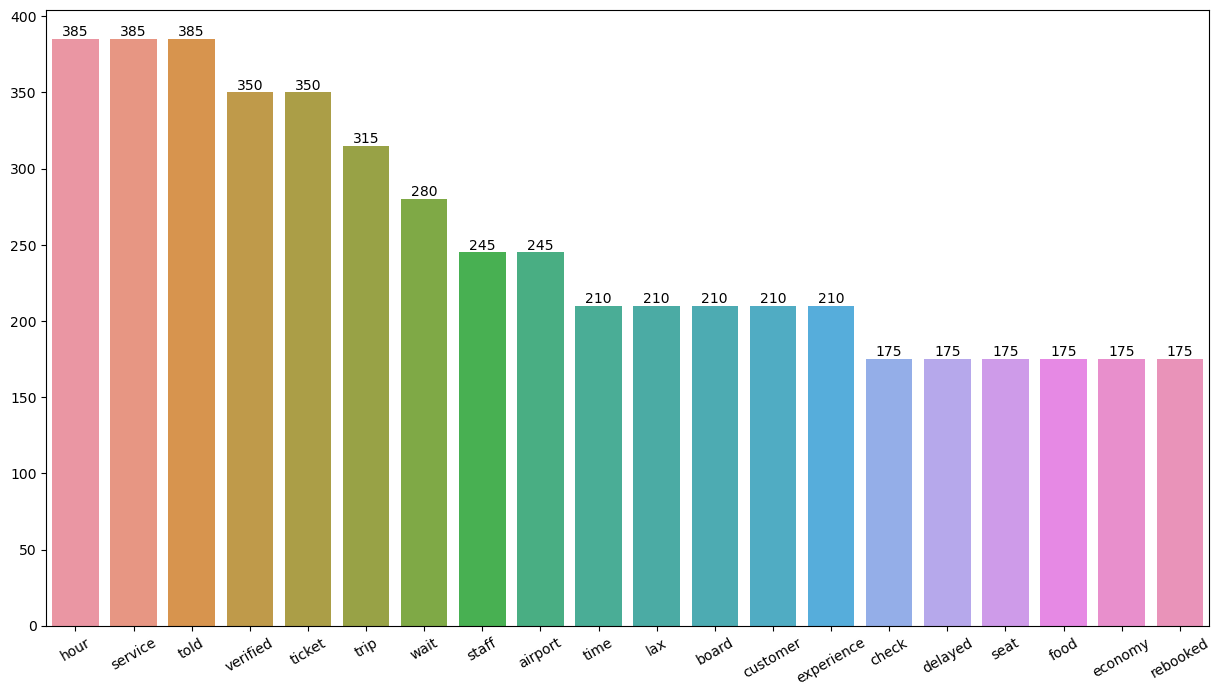

In [87]:
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<AxesSubplot:>

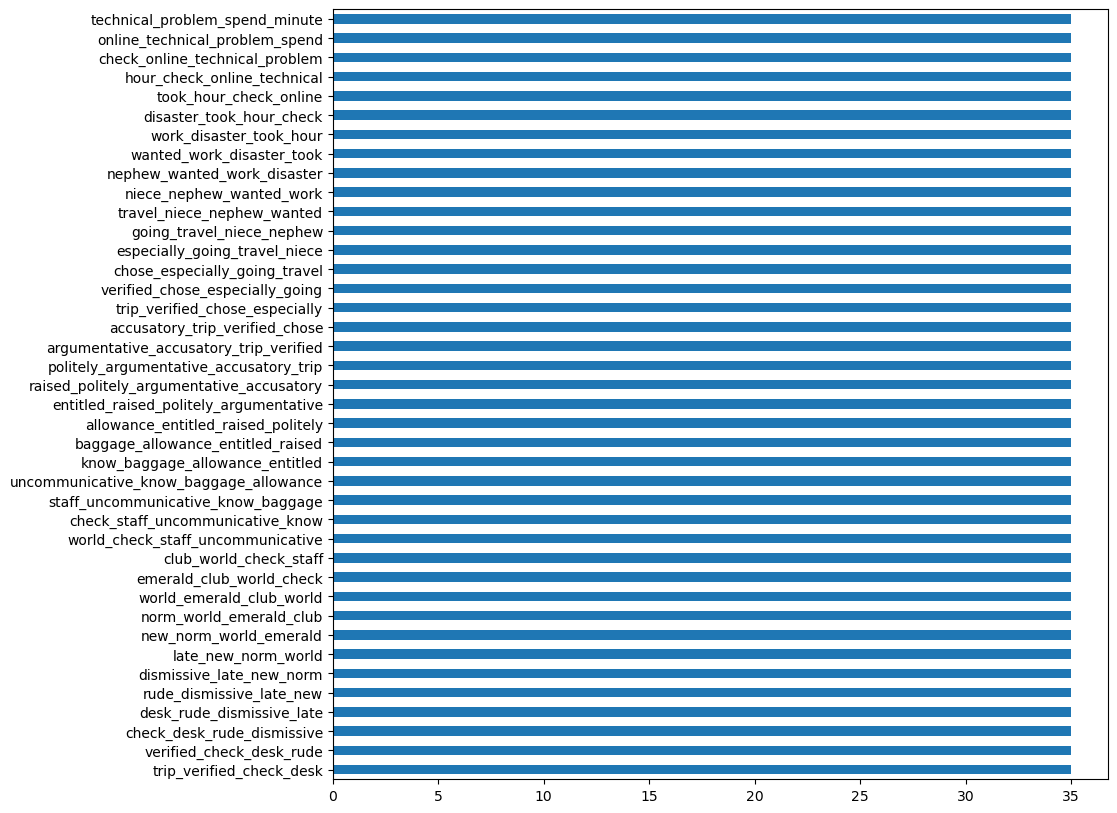

In [88]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [89]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<AxesSubplot:>

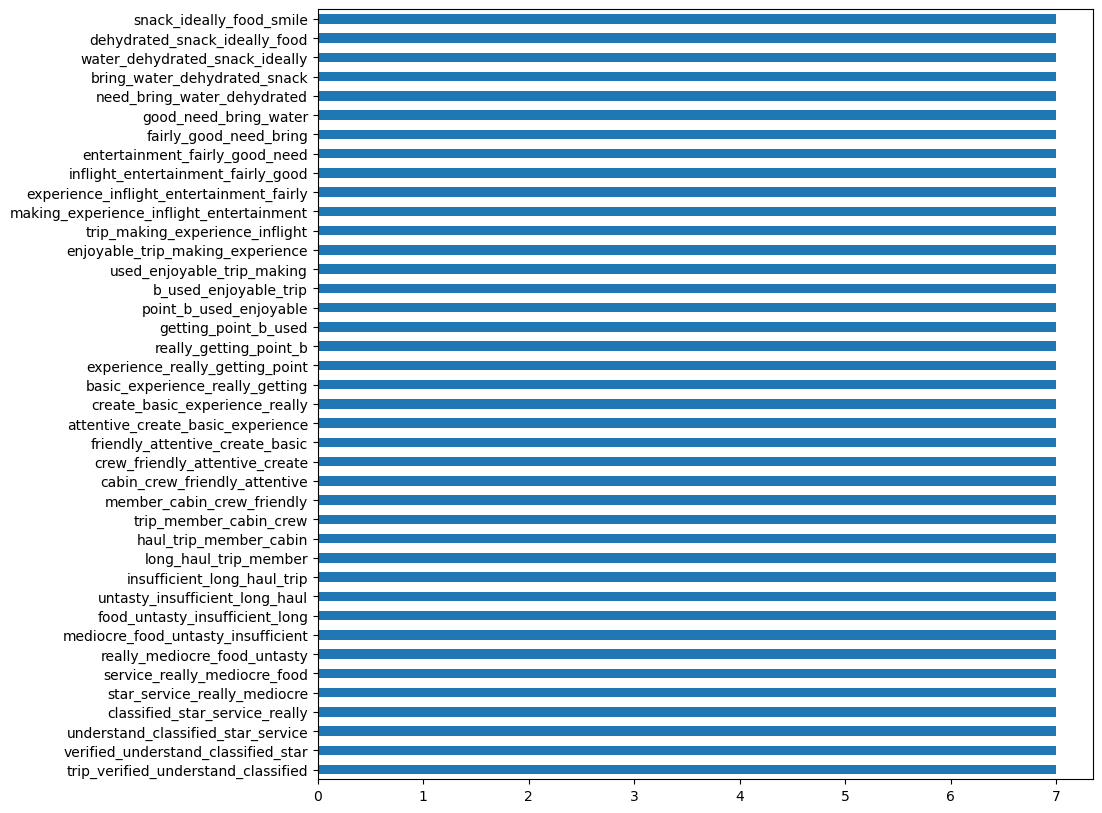

In [90]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<AxesSubplot:>

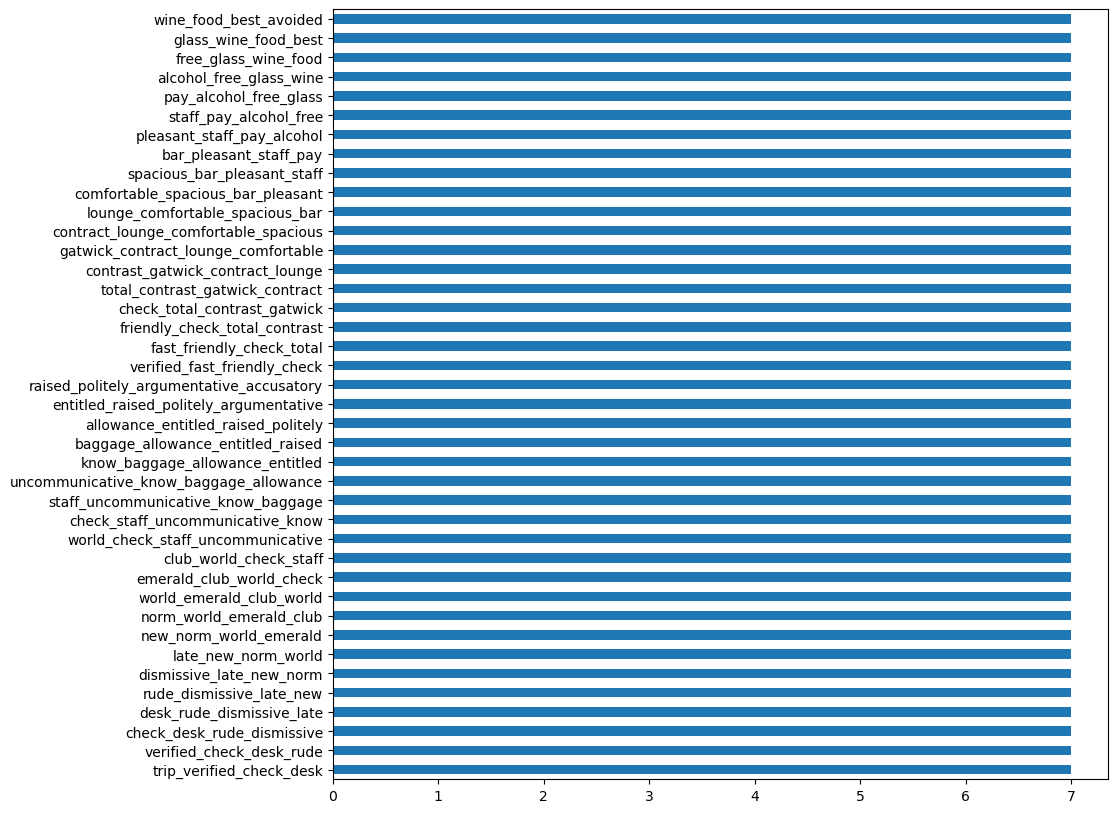

In [91]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<AxesSubplot:>

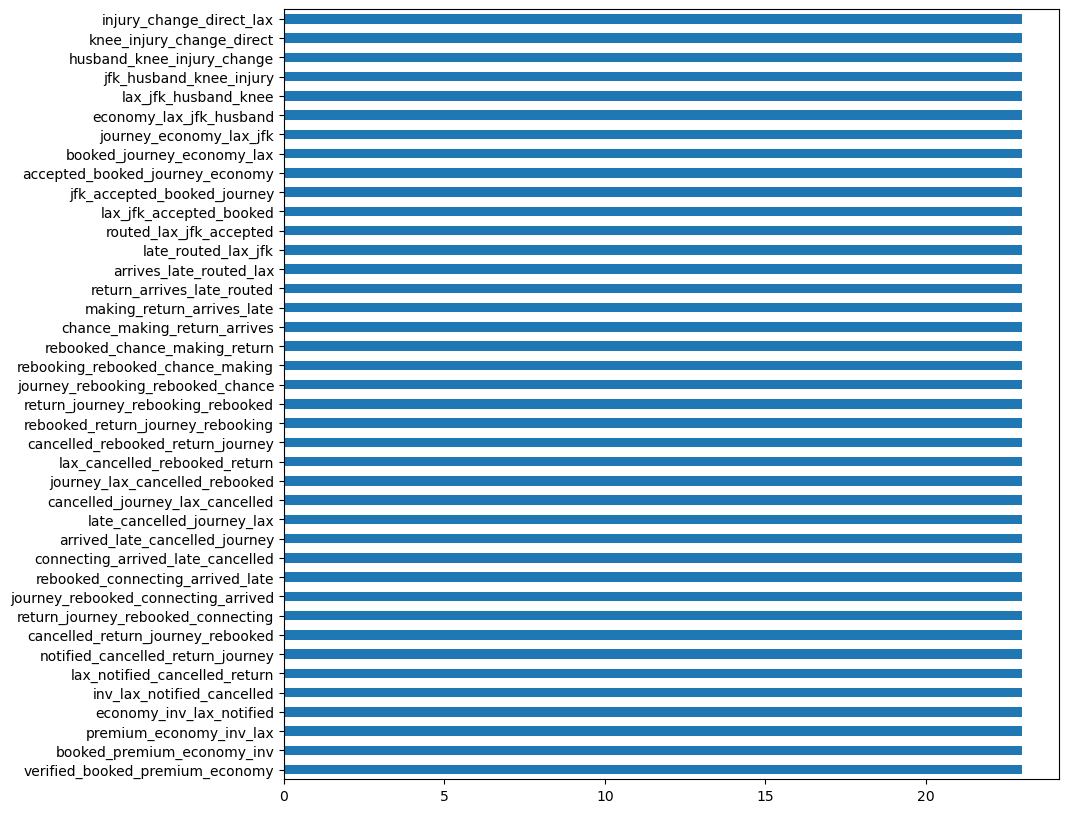

In [92]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [94]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [95]:
print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

280 number of reviews between -0.2 and 0.2 polarity score
210 number of reviews between -0.1 and 0.1 polarity score


In [97]:
%%capture
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

In [98]:
df.label.value_counts()

 1    210
-1    140
Name: label, dtype: int64

In [99]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names()

In [100]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [101]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0        ticket           350.1        flight           595.1            ba   
1         claim           175.1           lax           210.1       service   
2         could           140.1            ba           175.1       gatwick   
3          cost           140.1      rebooked           175.1           two   
4        change           105.1           lhr           175.1          sale   
5      customer           105.1          told           175.1     passenger   
6     purchased           105.1          hour           175.1         staff   
7         offer           105.1       journey           140.1            ok   
8    difference           105.1           jfk           140.1          long   
9          name           105.1       economy           140.1        better   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0           105.1          crew           105.1        flight             0.1   
1           105.1          wine            70.1      verified             0.1   
2            70.1         staff            35.1         staff             0.1   
3            70.1           one            35.1            ba             0.1   
4            70.1      verified            35.1          wait             0.1   
5            70.1         seems            35.1          time             0.1   
6            35.1         check            35.1           one             0.1   
7            35.1            ba            35.1       service             0.1   
8            35.1         board            35.1          trip             0.1   
9            35.1         great            35.1         could             0.1   

  Topic 5 words Topic 5 weights  Topic 6 words Topic 6 weights Topic 7 words  \
0        flight           140.1           trip           175.1          hour   
1         delay           105.1     experience           140.1          wait   
2         pilot           105.1         really           105.1         plane   
3         staff            70.1       verified           105.1          told   
4          wait            70.1          great           105.1          seat   
5       quickly            70.1         flight           105.1         check   
6          take            70.1          world            70.1       service   
7     announced            70.1  entertainment            70.1          also   
8          late            35.1           club            70.1         first   
9          time            35.1        another            70.1       airport   

  Topic 7 weights  
0           140.1  
1           105.1  
2           105.1  
3           105.1  
4            70.1  
5            70.1  
6            70.1  
7            70.1  
8            70.1  
9            70.1

In [102]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.01878892, 0.10173833],
       [0.17780742, 0.37016808],
       [0.        , 1.6739339 ],
       [1.29849336, 0.        ],
       [0.05942636, 0.44986493],
       [0.02678201, 0.11615482],
       [0.05526491, 0.03278624],
       [0.08397635, 0.20160475],
       [0.31092178, 0.57411304],
       [0.04638794, 0.17079799],
       [0.01878892, 0.10173833],
       [0.17780742, 0.37016808],
       [0.        , 1.6739339 ],
       [1.29849336, 0.        ],
       [0.05942636, 0.44986493],
       [0.02678201, 0.11615482],
       [0.05526491, 0.03278624],
       [0.08397635, 0.20160475],
       [0.31092178, 0.57411304],
       [0.04638794, 0.17079799],
       [0.01878892, 0.10173833],
       [0.17780742, 0.37016808],
       [0.        , 1.6739339 ],
       [1.29849336, 0.        ],
       [0.05942636, 0.44986493],
       [0.02678201, 0.11615482],
       [0.05526491, 0.03278624],
       [0.08397635, 0.20160475],
       [0.31092178, 0.57411304],
       [0.04638794, 0.17079799],
       [0.

In [103]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [104]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0        ticket             7.1        flight             7.5
1         claim             3.5           lax             2.8
2         could             3.4           lhr             2.3
3          told             3.1           jfk             1.9
4          cost             2.8       journey             1.9
5      customer             2.6      rebooked             1.7
6            ba             2.3          hour             1.6
7     purchased             2.2       economy             1.6
8        change             2.2     cancelled             1.5
9          name             2.1        return             1.4

In [106]:
cwd = os.getcwd()

#read the csv

df = pd.read_csv(cwd + "/customer_booking.csv",  encoding="ISO-8859-1")

In [107]:
df.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [108]:
df.shape

(50000, 14)

In [109]:
df.describe()

num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000               0.000000   
25%               0.000000              0.000000               0.000000   
50%               1.000000              0.000000               0.000000   
75%               1.000000              1.000000               1.000000   
max               1.000000              1.000000               1.000000   

       flight_duration  booking_complete  
count     50000.000000      50000.000000  
mean          7.277561          0.149560  
std           1.496863          0.356643  
min           4.670000          0.000000  
25%           5.620000          0.000000  
50%           7.570000          0.000000  
75%           8.830000          0.000000  
max           9.500000          1.000000

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [111]:
per_internet = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100
per_mobile = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100

In [112]:
print(f"Number of bookings done through internet: {per_internet} %")
print(f"Number of bookings done through phone call: {per_mobile} %")

Number of bookings done through internet: 88.764 %
Number of bookings done through phone call: 11.236 %


In [113]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100

In [114]:
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


<AxesSubplot:xlabel='purchase_lead', ylabel='Count'>

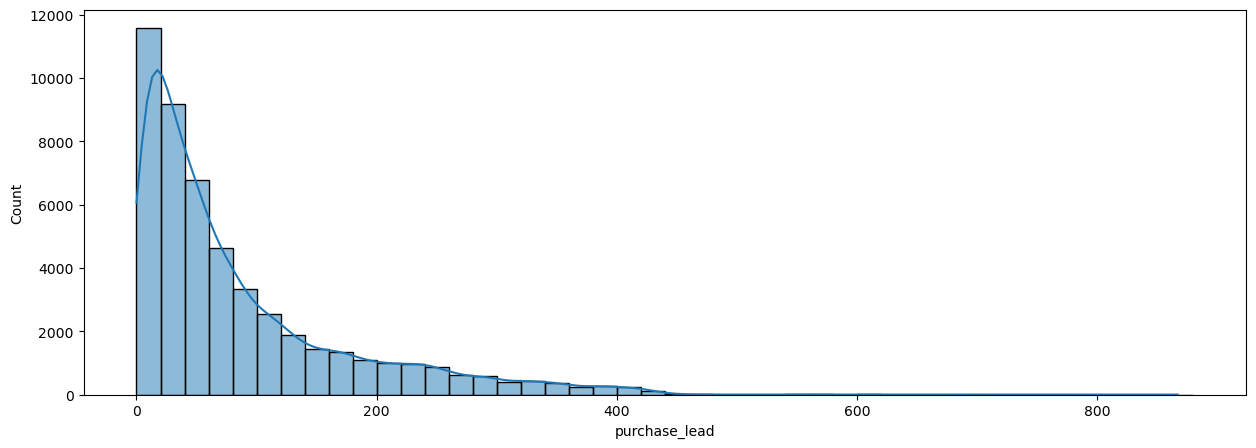

In [115]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)

In [116]:
(df.purchase_lead >600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

In [117]:
df[df.purchase_lead > 600]

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
835                 3      Internet  RoundTrip            641              46   
6148                1      Internet  RoundTrip            614              19   
24119               1      Internet  RoundTrip            704              23   
38356               2      Internet  RoundTrip            633               5   
39417               1        Mobile  RoundTrip            625               5   
42916               1        Mobile  RoundTrip            605               6   
46716               2      Internet  RoundTrip            606               6   
48259               3      Internet  RoundTrip            867               6   

       flight_hour flight_day   route   booking_origin  wants_extra_baggage  \
835              6        Sun  AKLKUL         Malaysia                    1   
6148            11        Wed  COKMEL        Australia                    0   
24119            8        Tue  PNHSYD        Australia                    0   
38356           10        Sat  HKTOOL        Australia                    0   
39417           15        Fri  ICNRGN  Myanmar (Burma)                    0   
42916           18        Thu  BLRMEL            India                    0   
46716            6        Fri  HKTTPE    United States                    0   
48259            7        Mon  KIXMLE            Japan                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
835                       0                      1             8.83   
6148                      0                      0             8.83   
24119                     0                      0             8.58   
38356                     0                      1             8.83   
39417                     0                      0             6.62   
42916                     0                      0             8.83   
46716                     0                      1             4.67   
48259                     0                      1             7.00   

       booking_complete  
835                   1  
6148                  0  
24119                 0  
38356                 0  
39417                 0  
42916                 0  
46716                 0  
48259                 1

<AxesSubplot:xlabel='length_of_stay', ylabel='Count'>

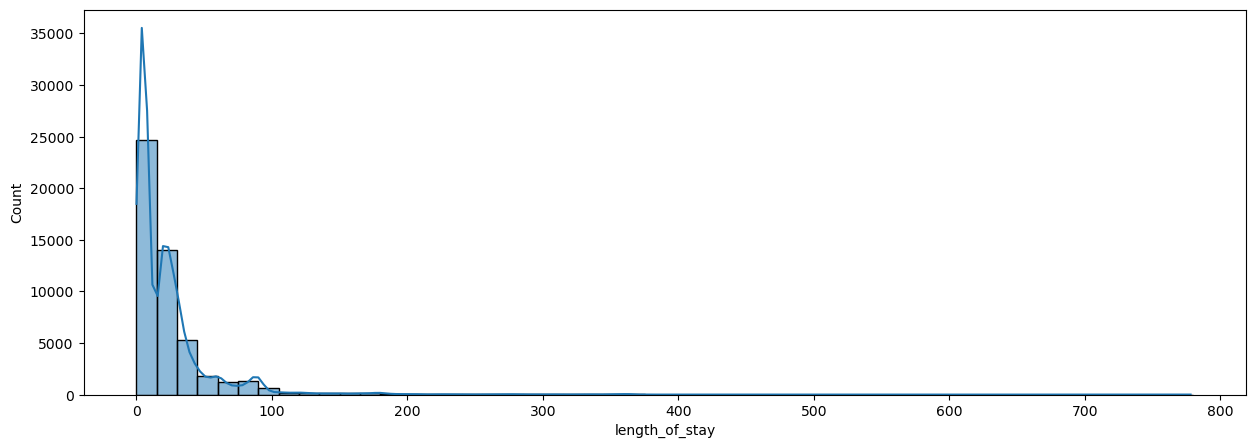

In [118]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=15,kde=True)

In [119]:
(df.length_of_stay> 200).value_counts()

False    49721
True       279
Name: length_of_stay, dtype: int64

In [120]:
df[df.length_of_stay> 500].booking_complete.value_counts()

0    9
1    1
Name: booking_complete, dtype: int64

In [121]:
df = df[df.purchase_lead <500 ]

In [122]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df.flight_day = df.flight_day.map(mapping)

In [123]:
df.flight_day.value_counts()

1    8100
3    7671
2    7670
4    7423
5    6759
7    6550
6    5809
Name: flight_day, dtype: int64

Text(0, 0.5, 'Number of bookings')

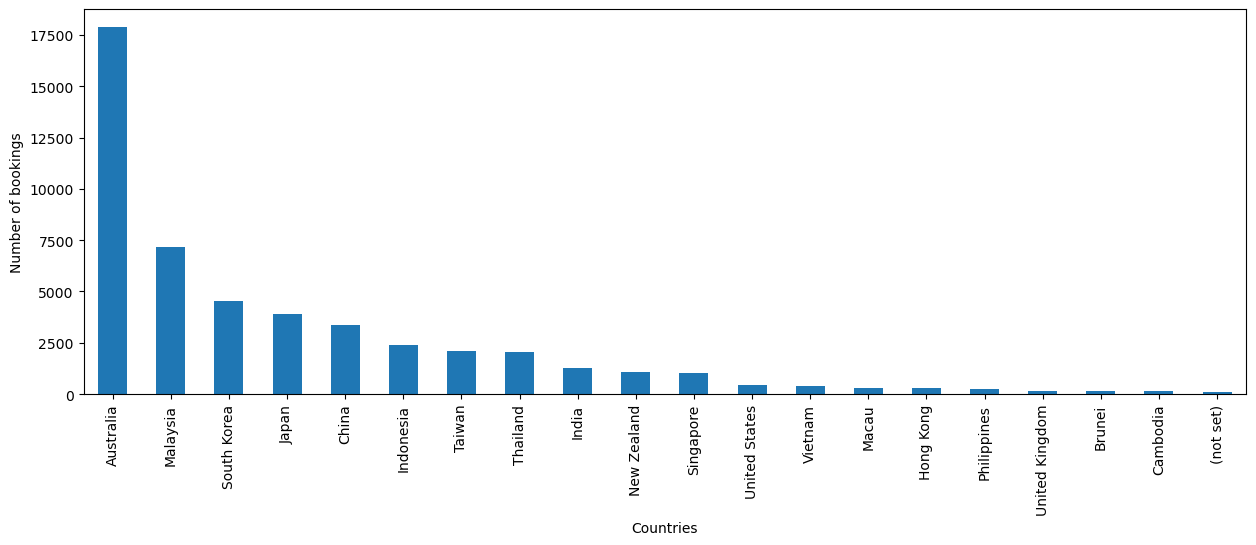

In [124]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Text(0, 0.5, 'Number of complete bookings')

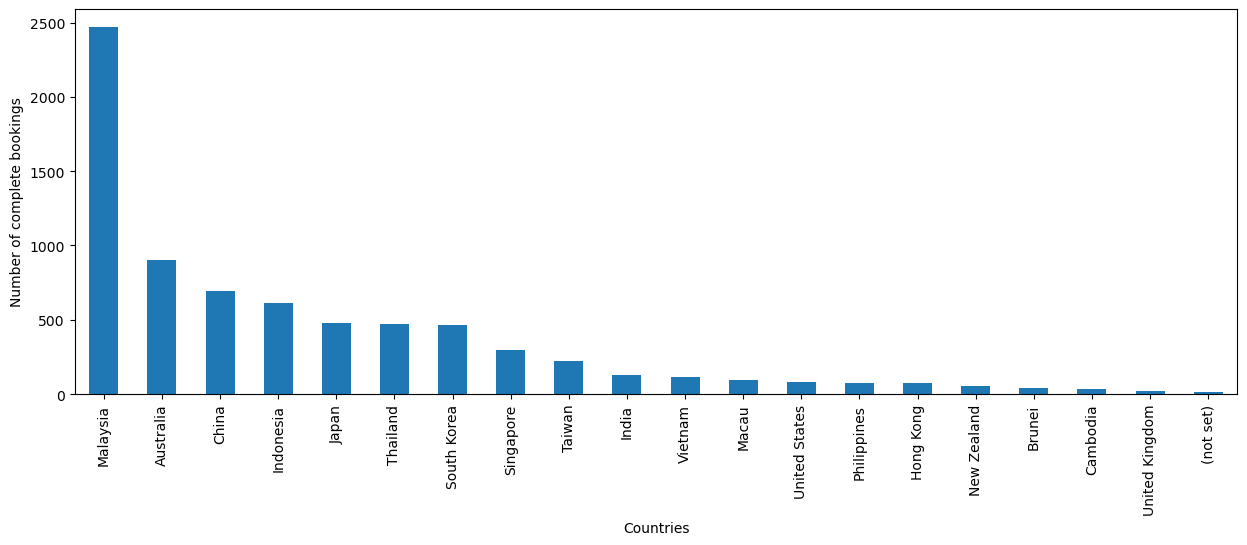

In [125]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

In [126]:
successful_booking_per = df.booking_complete.value_counts().values[0] / len(df) * 100

In [127]:
unsuccessful_booking_per = 100-successful_booking_per

In [128]:
print(f"Out of 50000 booking entries only {round(unsuccessful_booking_per,2)} % bookings were successfull or complete.")

Out of 50000 booking entries only 14.96 % bookings were successfull or complete.


In [129]:
df.to_csv(cwd + "/filtered_customer_booking.csv")

In [130]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})

In [131]:
cwd = os.getcwd()

df = pd.read_csv(cwd + "/filtered_customer_booking.csv", index_col=0)

In [132]:
df = df.reset_index(drop=True)

In [133]:
df

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49977               2      Internet  RoundTrip             27               6   
49978               1      Internet  RoundTrip            111               6   
49979               1      Internet  RoundTrip             24               6   
49980               1      Internet  RoundTrip             15               6   
49981               1      Internet  RoundTrip             19               6   

       flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0                7           6  AKLDEL    New Zealand                    1   
1                3           6  AKLDEL    New Zealand                    0   
2               17           3  AKLDEL          India                    1   
3                4           6  AKLDEL    New Zealand                    0   
4               15           3  AKLDEL          India                    1   
...            ...         ...     ...            ...                  ...   
49977            9           6  PERPNH      Australia                    1   
49978            4           7  PERPNH      Australia                    0   
49979           22           6  PERPNH      Australia                    0   
49980           11           1  PERPNH      Australia                    1   
49981           10           4  PERPNH      Australia                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                         0                      0             5.52   
1                         0                      0             5.52   
2                         1                      0             5.52   
3                         0                      1             5.52   
4                         0                      1             5.52   
...                     ...                    ...              ...   
49977                     0                      1             5.62   
49978                     0                      0             5.62   
49979                     0                      1             5.62   
49980                     0                      1             5.62   
49981                     1                      0             5.62   

       booking_complete  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
49977                 0  
49978                 0  
49979                 0  
49980                 0  
49981                 0  

[49982 rows x 14 columns]

In [134]:
df_final = df

In [135]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [136]:
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [137]:
label = df['booking_complete']

In [138]:
df_final = df_final.drop('booking_complete', axis=1)

In [139]:
df_final

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0                   2            262              19            7           6   
1                   1            112              20            3           6   
2                   2            243              22           17           3   
3                   1             96              31            4           6   
4                   2             68              22           15           3   
...               ...            ...             ...          ...         ...   
49977               2             27               6            9           6   
49978               1            111               6            4           7   
49979               1             24               6           22           6   
49980               1             15               6           11           1   
49981               1             19               6           10           4   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                        1                     0                      0   
1                        0                     0                      0   
2                        1                     1                      0   
3                        0                     0                      1   
4                        1                     0                      1   
...                    ...                   ...                    ...   
49977                    1                     0                      1   
49978                    0                     0                      0   
49979                    0                     0                      1   
49980                    1                     0                      1   
49981                    0                     1                      0   

       flight_duration  Internet  Mobile  RoundTRip  OneWayTrip  CircleTrip  
0                 5.52       1.0     0.0        0.0         0.0         1.0  
1                 5.52       1.0     0.0        0.0         0.0         1.0  
2                 5.52       1.0     0.0        0.0         0.0         1.0  
3                 5.52       1.0     0.0        0.0         0.0         1.0  
4                 5.52       1.0     0.0        0.0         0.0         1.0  
...                ...       ...     ...        ...         ...         ...  
49977             5.62       1.0     0.0        0.0         0.0         1.0  
49978             5.62       1.0     0.0        0.0         0.0         1.0  
49979             5.62       1.0     0.0        0.0         0.0         1.0  
49980             5.62       1.0     0.0        0.0         0.0         1.0  
49981             5.62       1.0     0.0        0.0         0.0         1.0  

[49982 rows x 14 columns]

In [140]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [141]:
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [142]:
scaled_df['label']  = label

In [143]:
scaled_df

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0            0.400769       1.971093       -0.119401    -0.381588    1.096876   
1           -0.579424       0.302987       -0.089895    -1.120618    1.096876   
2            0.400769       1.759799       -0.030885     1.465988   -0.408618   
3           -0.579424       0.125056        0.234662    -0.935861    1.096876   
4            0.400769      -0.186323       -0.030885     1.096473   -0.408618   
...               ...            ...             ...          ...         ...   
49977        0.400769      -0.642272       -0.502969    -0.012073    1.096876   
49978       -0.579424       0.291867       -0.502969    -0.935861    1.598707   
49979       -0.579424      -0.675634       -0.502969     2.389776    1.096876   
49980       -0.579424      -0.775721       -0.502969     0.357443   -1.412280   
49981       -0.579424      -0.731238       -0.502969     0.172685    0.093214   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                 0.703587             -0.650054              -0.863557   
1                -1.421288             -0.650054              -0.863557   
2                 0.703587              1.538334              -0.863557   
3                -1.421288             -0.650054               1.158002   
4                 0.703587             -0.650054               1.158002   
...                    ...                   ...                    ...   
49977             0.703587             -0.650054               1.158002   
49978            -1.421288             -0.650054              -0.863557   
49979            -1.421288             -0.650054               1.158002   
49980             0.703587             -0.650054               1.158002   
49981            -1.421288              1.538334              -0.863557   

       flight_duration  Internet    Mobile  RoundTRip  OneWayTrip  CircleTrip  \
0            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
1            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
2            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
3            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
4            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
...                ...       ...       ...        ...         ...         ...   
49977        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
49978        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
49979        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
49980        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
49981        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   

       label  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
49977      0  
49978      0  
49979      0  
49980      0  
49981      0  

[49982 rows x 15 columns]

<AxesSubplot:>

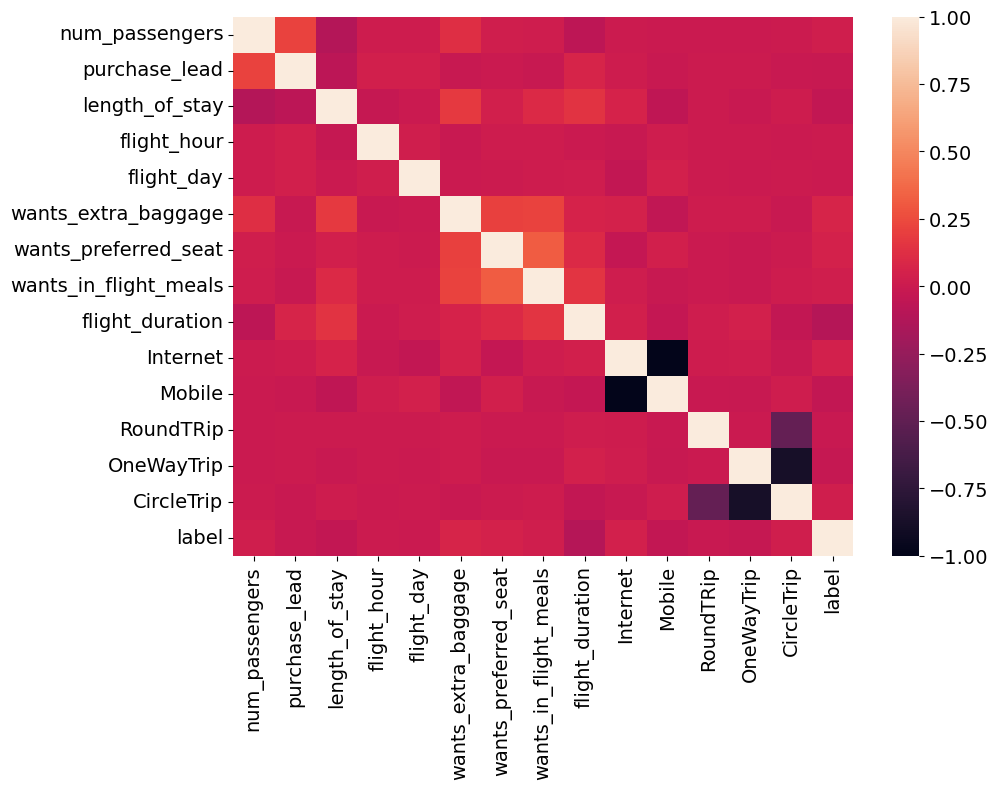

In [144]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)

In [145]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [148]:

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

In [149]:
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

In [150]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.72 respectively


0.9341002876078529

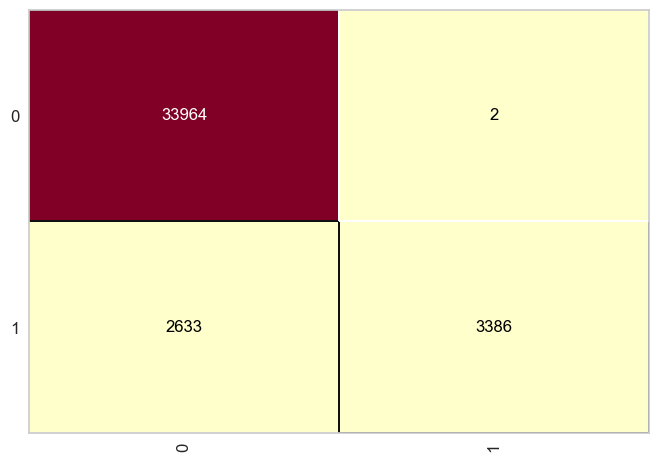

In [151]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

In [152]:
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.86, 0.56 and 0.07 respectively


0.8554566369910973

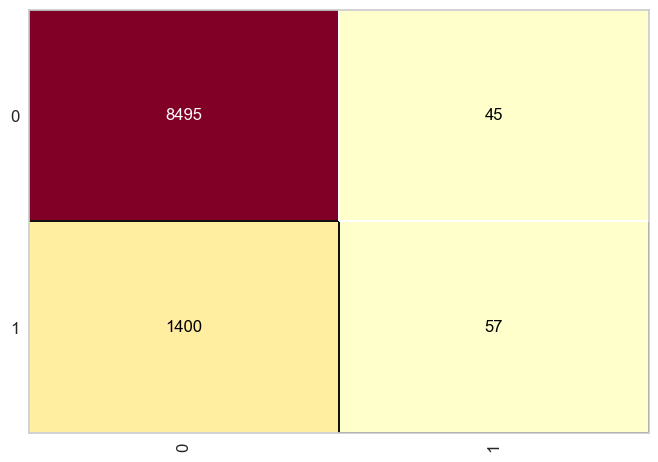

In [153]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

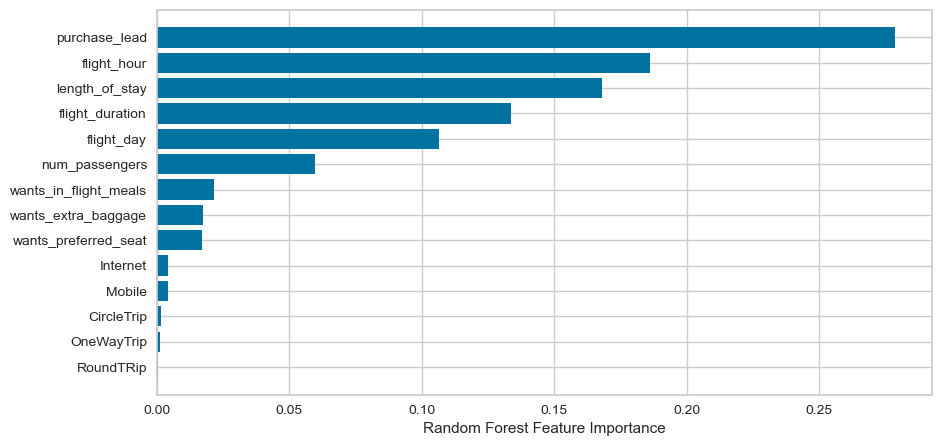

In [154]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [155]:
scaled_df.label.value_counts()

0    42506
1     7476
Name: label, dtype: int64

In [156]:
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [157]:
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [158]:
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [159]:
scaled_df_new

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0           -0.579424      -0.119599        0.972293     1.096473   -0.910449   
1            0.400769      -0.797962       -0.502969     1.096473    1.598707   
2           -0.579424      -0.898048        0.352683    -0.381588   -1.412280   
3           -0.579424      -0.909169        2.004977    -0.196830    0.093214   
4            3.341348      -0.575548       -0.502969     0.542200    0.595045   
...               ...            ...             ...          ...         ...   
15471       -0.579424      -0.864686        1.768935     0.726958   -0.910449   
15472        0.400769       0.403074       -0.502969    -0.566346   -1.412280   
15473       -0.579424      -0.842445       -0.532474    -1.490134   -0.408618   
15474        0.400769      -0.809083       -0.650495    -0.012073    1.096876   
15475       -0.579424      -0.775721       -0.148906    -0.751103   -1.412280   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                 0.703587             -0.650054               1.158002   
1                 0.703587             -0.650054               1.158002   
2                 0.703587             -0.650054              -0.863557   
3                 0.703587             -0.650054              -0.863557   
4                -1.421288             -0.650054              -0.863557   
...                    ...                   ...                    ...   
15471             0.703587             -0.650054              -0.863557   
15472             0.703587             -0.650054              -0.863557   
15473             0.703587             -0.650054               1.158002   
15474             0.703587             -0.650054              -0.863557   
15475            -1.421288             -0.650054              -0.863557   

       flight_duration  Internet    Mobile  RoundTRip  OneWayTrip  CircleTrip  \
0             0.870293  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
1            -1.741921 -2.810681  2.810681  -0.048231   -0.088336    0.100826   
2            -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
3            -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
4             1.037314 -2.810681  2.810681  -0.048231   -0.088336    0.100826   
...                ...       ...       ...        ...         ...         ...   
15471         1.037314  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
15472        -1.474687  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
15473        -1.708517  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
15474         1.037314  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
15475         0.870293  0.355786 -0.355786  -0.048231   -0.088336    0.100826   

       label  
0          0  
1          0  
2          0  
3          1  
4          0  
...      ...  
15471      1  
15472      1  
15473      1  
15474      0  
15475      0  

[15476 rows x 15 columns]

In [160]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [161]:
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [163]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively")

Accuracy, precision, recall and f1-score for training data are 0.6, 0.58, 0.57, 0.63 and 0.57 respectively


0.5998062015503876

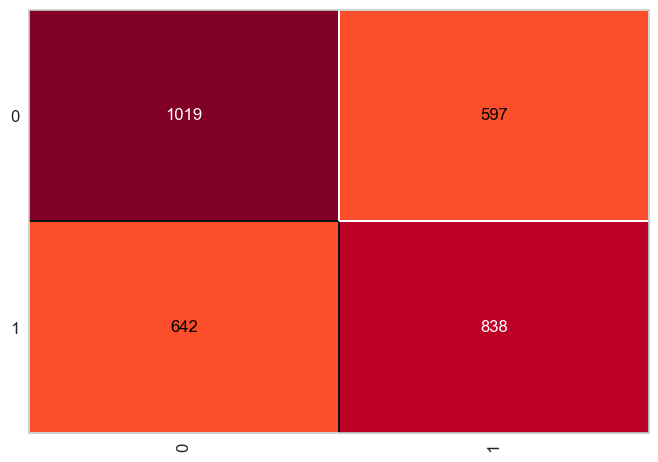

In [164]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

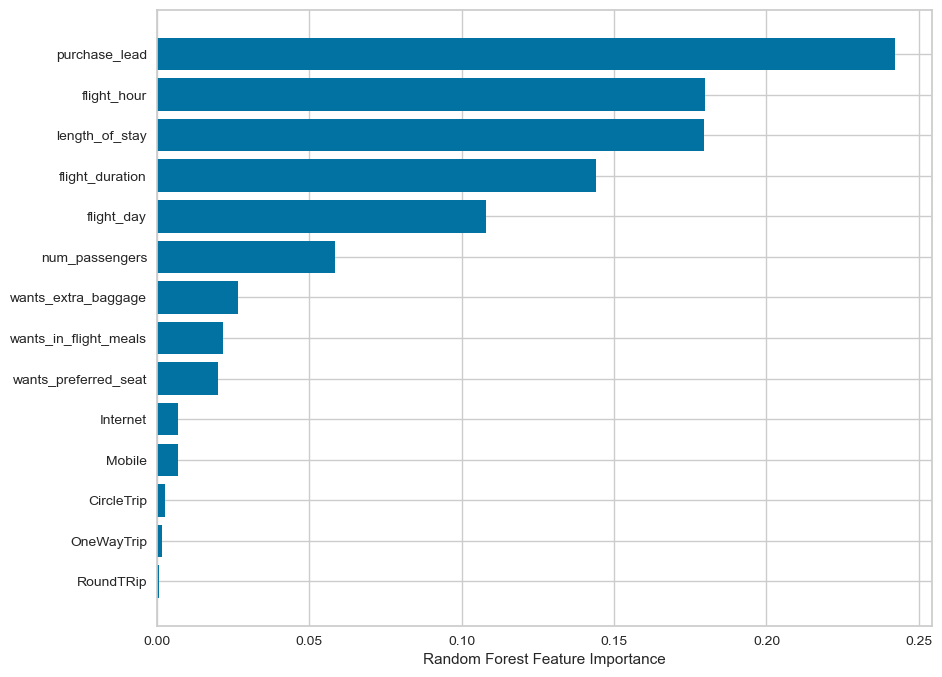

In [165]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")